In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1037k      0 --:--:-- --:--:-- --:--:-- 1037k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
%matplotlib inline
import pandas as pd
import geopandas
import contextily

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
comuni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/Com01012021_g')
fiumi = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Corsi_acqua_Piano_di_Gestione.zip')
autostrade = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Autostrade_10000_CT10_line.zip')
quartieri_milano = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/quartieri di Milano/ds964_nil_wm.zip')
fontanelle = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Fontanelle.zip')
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/ProvCM01012021_g')
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/4E INF/GEOpands/CSV/Mappa Italia/Reg01012021_g')

**si vogliono estrarre alcune informazioni dai dataset riguardanti la regione lombardia. In particolare si vogliono avere informazioni su:**


**1. l'elenco dei comuni con i fiumi che li attraversano (nome comune e nome fiume)**


In [ ]:
fiumi_lomb = fiumi[fiumi['REGIONE']=='Lombardia']
fiumi_lomb

,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627..."
1,191,IT03POTI3SNCA1LO,artificiale,Lombardia,Scolmatore Piene Nord - Ovest (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,scarso,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,34035.857991,"MULTILINESTRING ((494060.091 5029696.046, 4940..."
2,215,IT03N0080447LO,naturale,Lombardia,Lambro (Fiume),Lambro (Asta),06SS4N,sì,sì,sì,no,sì,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,21811.145089,"MULTILINESTRING ((536963.747 5005395.412, 5369..."
3,252,IT03N008044003021LO,naturale,Lombardia,Garbogera (Torrente),Lambro (Asta),06IN7N,sì,no,sì,sì,no,no,no,no,no,sì,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,19767.119220,"LINESTRING (509280.513 5047845.024, 509281.795..."
4,255,IT03N0080440441LO,naturale,Lombardia,Sillaro Salerano,Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,13180.757122,"LINESTRING (528977.056 5024109.798, 528981.181..."
5,256,IT03N0080440701LO,naturale,Lombardia,Addetta (Colatore),Lambro (Asta),06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,media,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,9403.459186,"MULTILINESTRING ((530299.337 5029522.740, 5302..."
6,282,IT03POLSRECA1LO,artificiale,Lombardia,Redefossi (Cavo),nd,06SS1N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,alta,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,18403.681560,"LINESTRING (514894.561 5036362.164, 514898.993..."
10,84,IT03POAD3MUCA1LO,artificiale,Lombardia,Muzza (Colatore),nd,None,sì,no,sì,no,no,no,no,no,no,sì,ADDA,no,no,sufficiente,bassa,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,60521.688952,"MULTILINESTRING ((541297.507 5041518.075, 5412..."
11,89,IT03N0080410020107012LO,naturale,Lombardia,Merlata (Torrente),Olona,06IN7N,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,sufficiente,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,6596.411258,"LINESTRING (508090.899 5042218.610, 508089.941..."
12,91,IT03N008044002013LO,naturale,Lombardia,Olona (Fiume),Olona,06SS2D,sì,no,sì,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,no,no,scarso,alta,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2027,Art. 4.4 per obiettivo ecologico,14141.256453,"MULTILINESTRING ((496168.003 5046279.338, 4961..."


In [ ]:
lombardia = regioni[regioni['DEN_REG']=='Lombardia']
lombardia

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."


In [ ]:
milano = province[province['DEN_UTS']=='Milano']
milano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


In [ ]:
comuni_lomb = comuni[comuni.within(lombardia.geometry.squeeze())]
comuni_lomb

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1448,1,3,12,0,12,12001,012001,Agra,None,0,6996.108320,2.942389e+06,"POLYGON ((482802.662 5097733.142, 482784.662 5..."
1449,1,3,12,0,12,12002,012002,Albizzate,None,0,9255.748026,3.813831e+06,"POLYGON ((485235.221 5064709.066, 485545.361 5..."
1450,1,3,12,0,12,12003,012003,Angera,None,0,24194.847570,1.748219e+07,"POLYGON ((470218.756 5071198.335, 470937.656 5..."
1451,1,3,12,0,12,12004,012004,Arcisate,None,0,19072.979574,1.229388e+07,"POLYGON ((488207.686 5080963.765, 488368.654 5..."
1452,1,3,12,0,12,12005,012005,Arsago Seprio,None,0,15318.402658,1.053346e+07,"POLYGON ((478637.631 5063107.396, 478750.600 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7741,1,3,108,0,108,108051,108051,Busnago,None,0,11376.029586,5.834750e+06,"POLYGON ((535742.586 5052473.474, 535839.585 5..."
7742,1,3,108,0,108,108052,108052,Caponago,None,0,11874.711735,4.807794e+06,"POLYGON ((530927.622 5047008.514, 530890.358 5..."
7743,1,3,108,0,108,108053,108053,Cornate d'Adda,None,0,15414.910444,1.364665e+07,"POLYGON ((537678.573 5057235.438, 537951.570 5..."
7744,1,3,108,0,108,108054,108054,Lentate sul Seveso,None,0,17060.616570,1.431746e+07,"POLYGON ((508523.788 5059797.421, 509626.779 5..."


In [ ]:
join_comuni_fiumi = geopandas.sjoin(fiumi, comuni_lomb, op='intersects', how='left')
join_comuni_fiumi

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,OBJECTID,COD_PTUA16,NATURA,REGIONE,NOME,SOTTOBACIN,TIPOLOGIA,A_PROTETTA,SENSIBILE,VULNERABIL,D_HABITAT,D_UCCELLI,RAMSAR,BALNEAZION,VITA_PESCI,USO_POTAB,AREE_A_PR,BACINO,RAGG_ECO,RAGG_CHI,STATO_ECO,CONF_ECO,STATO_CHI,CONF_CHI,ANNI_CHI,ANNI_ECO,OBB_CHI,OBB_ECO,ESENZIONI,SHAPE_LEN,geometry,index_right,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1882,1,3,15,215,215,15146,015146,Milano,None,1,79382.994008,1.807534e+08
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1943,1,3,15,215,215,15251,015251,Vermezzo con Zelo,None,0,17174.679422,1.048998e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1861,1,3,15,215,215,15103,015103,Gaggiano,None,0,35500.172635,2.608967e+07
0,188,IT03POTI3GRCA1LO,artificiale,Lombardia,Naviglio Grande (Canale),nd,None,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,sufficiente,media,buono,media,2009-2014,2009-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,44301.215986,"LINESTRING (480362.262 5040575.220, 480364.627...",1927,1,3,15,215,215,15220,015220,Trezzano sul Naviglio,None,0,16835.128614,1.066083e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",1835,1,3,15,215,215,15050,015050,Carpiano,None,0,19875.381968,1.778886e+07
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",1873,1,3,15,215,215,15125,015125,Locate di Triulzi,None,0,19947.580410,1.267902e+07
43,656,IT03N0080440051LO,naturale,Lombardia,Lisone (Cavo),Lambro (Asta),06SS1N,no,no,no,no,no,no,no,no,no,no,LAMBRO - OLONA MERIDIONALE,sì,sì,scarso,media,buono,media,2012-2014,2012-2014,mantenimento dello stato buono,buono al 2021,Art. 4.4 per obiettivo ecologico,20640.150007,"MULTILINESTRING ((515431.664 5025817.802, 5154...",1889,1,3,15,215,215,15159,015159,Opera,None,0,13619.132661,7.595538e+06
44,676,IT03N0080981411LO,naturale,Lombardia,Navigliaccio (Colatore),Ticino Sub Lacuale,06SS1N,sì,no,sì,sì,sì,no,no,no,no,sì,TICINO,no,no,NC,None,NC,None,2014,2014,buono al 2021,buono al 2021,Art. 4.4 per obiettivo ecologico e

In [ ]:
comuni_fiumi = join_comuni_fiumi[['NOME', 'COMUNE']].sort_values(by='COMUNE')
comuni_fiumi

,NOME,COMUNE
1,Scolmatore Piene Nord - Ovest (Canale),Abbiategrasso
0,Naviglio Grande (Canale),Abbiategrasso
7,Ticino (Fiume),Abbiategrasso
18,Villoresi (Canale),Agrate Brianza
1,Scolmatore Piene Nord - Ovest (Canale),Albairate
...,...,...
30,Ticino (Fiume),Vigevano
31,Naviglio Martesana (Canale),Vimodrone
13,Lambro (Fiume),Vizzolo Predabissi
5,Addetta (Colatore),Vizzolo Predabissi


**2. contare per ogni comune il numero di fiumi che li attraversano. Se un comune non è attraversato da un fiume indicare 0**

**3. elenco delle province con le autostrade che le attraversano. Visualizzare anche le province che non sono attraversate da autostrade.**

In [ ]:
autostrade_lomb = autostrade[autostrade.within(lombardia.geometry.squeeze())]

In [ ]:
province_lomb = province[province.within(lombardia.geometry.squeeze())]

In [ ]:
prov_autostrade = geopandas.sjoin(autostrade_lomb, province_lomb, how='inner')
prov_autostrade

,TS_EID,COD_PE,PERCORSO,geometry,index_right,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area
3,65.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (521699.514 5024872.823, 521630.139...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
4,62.0,A50,TANGENZIALE OVEST DI MILANO,"LINESTRING (504384.530 5044095.266, 504414.405...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
5,90.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519364.775 5030574.241, 519401.151...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
6,78.0,A51,TANGENZIALE EST DI MILANO,"LINESTRING (519346.650 5030596.741, 519377.151...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
10,130.0,A8,AUTOSTRADA MILANO- VARESE,"LINESTRING (510188.551 5038184.696, 510192.926...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
11,131.0,A8,AUTOSTRADA MILANO- VARESE,"LINESTRING (510188.551 5038184.696, 510186.301...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
15,140.0,A9,AUTOSTRADA LAINATE-COMO-CHIASSO,"LINESTRING (500870.596 5047376.792, 500867.222...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
16,1915.0,A4,AUTOSTRADA TORINO-TRIESTE,"LINESTRING (509605.078 5040334.699, 509647.828...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
17,1916.0,A4,AUTOSTRADA TORINO-TRIESTE,"LINESTRING (509605.078 5040334.699, 509629.203...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09
20,45.0,A4,AUTOSTRADA TORINO-TRIESTE,"LINESTRING (483693.626 5035220.147, 483734.501...",14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09


In [ ]:
autostrade_lomb['COD_PE']

3      A50
4      A50
5      A51
6      A51
9       A8
10      A8
11      A8
12     A8D
13     A8D
14      A9
15      A9
16      A4
17      A4
18      A4
19      A4
20      A4
21      A4
23     A52
24     A52
27    RAA7
28    RAA7
Name: COD_PE, dtype: object

In [ ]:
prov_autostrade[['PERCORSO', 'DEN_UTS']]

,PERCORSO,DEN_UTS
3,TANGENZIALE OVEST DI MILANO,Milano
4,TANGENZIALE OVEST DI MILANO,Milano
5,TANGENZIALE EST DI MILANO,Milano
6,TANGENZIALE EST DI MILANO,Milano
10,AUTOSTRADA MILANO- VARESE,Milano
11,AUTOSTRADA MILANO- VARESE,Milano
15,AUTOSTRADA LAINATE-COMO-CHIASSO,Milano
16,AUTOSTRADA TORINO-TRIESTE,Milano
17,AUTOSTRADA TORINO-TRIESTE,Milano
20,AUTOSTRADA TORINO-TRIESTE,Milano


**4. Visualizzare su una mappa i risultati dell'esercizio 3 facendo in modo che le province che non sono attravesate da autostrade siano solo contornate di nero mentre el altre province devono essere colorate a seconda del numero di autostrade che le attraversano.**

In [ ]:
province_attr = province_lomb[province_lomb.intersects(autostrade_lomb.geometry.squeeze())]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


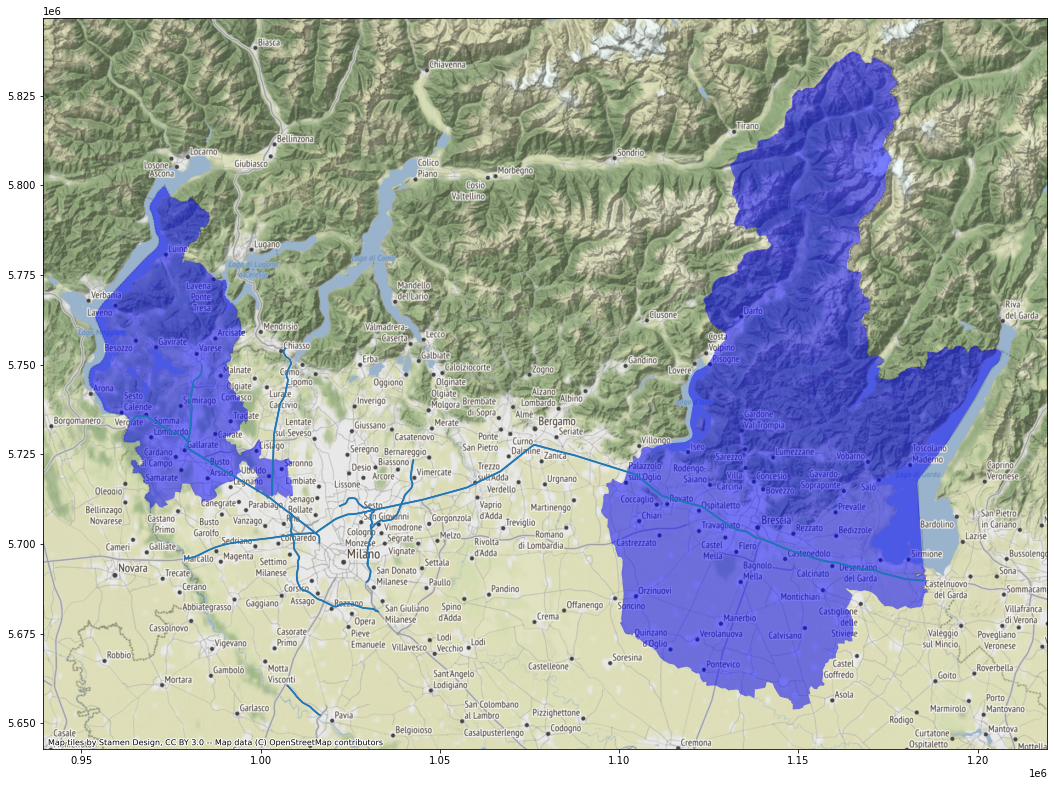

In [ ]:
ax = autostrade_lomb.to_crs(epsg=3857).plot(figsize=(18, 18))
province_attr.to_crs(epsg=3857).plot(ax=ax, facecolor='blue', alpha=0.5)
contextily.add_basemap(ax)

**5. Visualizzare su una mappa i quartieri di Milano e colorarli a seconda del numero di fontanelle presenti.**

In [ ]:
geoFontQuart = geopandas.sjoin(fontanelle, quartieri_milano, op='within', how='left')
geoFontQuart

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,Fonte_left,Licenza,geometry,index_right,ID_NIL,NIL,Valido_dal,Valido_al,Fonte_right,Shape_Leng,Shape_Area,OBJECTID
0,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.16165 45.47091 0.00000),83.0,68.0,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172.0
1,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.23184 45.46831 0.00000),76.0,22.0,CITTA' STUDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165.0
2,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.14380 45.48017 0.00000),18.0,58.0,DE ANGELI - MONTE ROSA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5765.950197,1.323029e+06,107.0
3,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.14401 45.48319 0.00000),18.0,58.0,DE ANGELI - MONTE ROSA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5765.950197,1.323029e+06,107.0
4,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.11746 45.49320 0.00000),47.0,65.0,Q.RE GALLARATESE - Q.RE SAN LEONARDO - LAMPUGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11053.767762,3.895679e+06,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...
77,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22943 45.47751 0.00000),76.0,22.0,CITTA' STUDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165.0
78,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22730 45.47965 0.00000),76.0,22.0,CITTA' STUDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165.0
79,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22773 45.47728 0.00000),76.0,22.0,CITTA' STUDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165.0
80,© OpenStreetMap contributors - OSM,Licenza ODbL - http://www.openstreetmap.org/co...,POINT Z (9.22815 45.47994 0.00000),76.0,22.0,CITTA' STUDI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6007.783217,2.207404e+06,165.0


In [ ]:
nFont = geoFontQuart.groupby('NIL').count()[['Shape_Leng']].reset_index().rename(columns={'Shape_Leng': 'Fontanelle'})
nFont

,NIL,Fontanelle
0,ADRIANO,1
1,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA,2
2,BANDE NERE,1
3,BOVISA,1
4,BRUZZANO,1
5,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,1
6,CASCINA MERLATA,2
7,CIMIANO - ROTTOLE - Q.RE FELTRE,2
8,CITTA' STUDI,6
9,DE ANGELI - MONTE ROSA,2


In [ ]:
geoCountComuni = pd.merge(fontanelle, quartieri_milano, on='NIL', how='inner')
nFont.plot(column='Fontalle', legend=True, alpha=0.7)

**6. Visualizzare l'elenco dei quartieri di Milano che confinano con comuni fuori Milano. Indicare il nome del quartiere e il nome del comune con cui confina.**

In [ ]:
comuni_fuori = comuni[~comuni.within(milano.geometry.squeeze())]
comuni_fuori

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


In [ ]:
comuni_fuori.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
quartieri_milano = quartieri_milano.to_crs(epsg=32632)

In [ ]:
quartieri_milano.crs

<Projected CRS: EPSG:32632>
Name: WGS 84 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°E and 12°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Austria. Cameroon. Denmark. Equatorial Guinea. France. Gabon. Germany. Italy. Libya. Liechtenstein. Monaco. Netherlands. Niger. Nigeria. Norway. Sao Tome and Principe. Svalbard. Sweden. Switzerland. Tunisia. Vatican City State.
- bounds: (6.0, 0.0, 12.0, 84.0)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
quartieri_conf = quartieri_milano[quartieri_milano.touches(comuni_fuori.geometry.squeeze())]

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1327: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
